<a href="https://colab.research.google.com/github/Aondona93/D-analytics/blob/main/Bankruptcy_in_Taiwan_%F0%9F%87%B9%F0%9F%87%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITLE:Bankruptcy in Taiwan

## 1.0. TITLE PAGE





Project Title:Bankruptcy Prediction in Taiwan

## 2.0. Table of Contents

1. Introduction

2. Data Description

3. Exploratory Data Analysis (EDA)
4. Data Preparation
5. Exploratory Data Analysis (EDA) And Resampling
6. Build Model
7. Communicate
8. Save Model and Make Predictions
9. Final Insight and Strategic Recommendations
10. Final Insight and Strategic Recommendations
11. Conclusion
12. Appendix

## 3.0.Introduction

<p align = 'justify'>Bankruptcy can have far-reaching consequences for investors, creditors, and the economy at large. Predicting potential business failures is crucial for minimizing financial risk and ensuring market stability. This project aims to develop a predictive model to identify companies in Taiwan that are likely to go bankrupt.

<p align = 'justify'>The dataset used in this project was collected from the Taiwan Economic Journal (TEJ) and spans the years 1999 to 2009. Company bankruptcy was determined in accordance with the business regulations of the Taiwan Stock Exchange. The dataset includes a range of financial ratios and operational indicators, offering valuable insights into the factors associated with bankruptcy.

<p align = 'justify'>By applying data preprocessing, exploratory analysis, and machine learning techniques, this project seeks to accurately classify companies as bankrupt or non-bankrupt, providing a practical tool for early warning and risk assessment in financial decision-making.</p>

## 4.0 Data Description
### 4.1 Data Source

<p align = 'justify'>The dataset used in this project originates from the Taiwan Economic Journal (TEJ), which compiled financial and operational data on companies listed in Taiwan from 1999 to 2009. The bankruptcy status of each company was determined based on the business regulations of the Taiwan Stock Exchange, making the dataset a reliable source for financial risk analysis. This dataset was later curated and made publicly available through the UCI Machine Learning Repository, a widely recognized platform for sharing standardized datasets for machine learning research. It includes 95 features, primarily financial ratios, and a binary target variable indicating whether a company eventually went bankrupt. The dataset's structured format and real-world relevance make it ideal for predictive modeling and classification tasks in the domain of financial risk management.</p>

### 4.2 Data Dictionary

<p align='justify'>The dataset consists of 95 independent variables (features) and 1 target variable, representing financial indicators and company status, respectively. These features are primarily quantitative financial ratios commonly used in corporate risk analysis. Below is a summary:</p>

Features (X):

*   ROA_C_before_interest_and_depreciation: Return on assets before interest and depreciation.
*   Debt_ratio: Total liabilities divided by total assets.

*   Current_ratio: Current assets divided by current liabilities.
* Net_value_per_share: A measure of shareholder equity per share.
the rest of the features can be explored in the appendix section.

Target (Y):A binary class column that has bankrupted companies identified as 1 and none-bankrupted companies identified as 0.

  The dataset has 6137 records(companies) with no missing values.














## 5.0 Data Preparation
### 5.1 Import Project Dependables

In [ ]:
import gzip#To unzip the file
import json #to read jason files
import pickle #to store the model
import matplotlib.pyplot as plt # for visualizations
import ipywidgets as widgets #for GUI control
import pandas as pd #data manipulations
from imblearn.over_sampling import RandomOverSampler#to handle data inmbalance
from ipywidgets import interact #for GUI control
from sklearn.ensemble import GradientBoostingClassifier #for classsification
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split# cross validation
#model selection.
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)#for evaluation
from sklearn.pipeline import make_pipeline#to make a model pipeline
import numpy as np# for numerical computations


### 5.2 Data Loading,Inspection and Cleaning

In [ ]:
def wrangle(FilePath):
    df=pd.read_excel(FilePath).set_index('id')
    return df



In [ ]:
df=wrangle('/content/taiwan_train.xlsx')
print(df.shape)
df.head()

(6137, 96)


,bankrupt,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
id,,,,,,,,,,,,,,,,,,,,,
1,True,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,True,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,True,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,True,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,True,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## 6.0 Exploratory Data Analysis (EDA)

Is there any missing data in the dataset? We will Create a Series where the index contains the name of the columns in df and the values are the number of NaNs in each column.

In [ ]:
nans_by_col =df.isna().sum()
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (96,)


,0
bankrupt,0
feat_1,0
feat_2,0
feat_3,0
feat_4,0


Is the data imbalanced? We will Create a bar chart that shows the normalized value counts for the column df["bankrupt"].

(Text(0.5, 1.0, 'Class Balance'),)

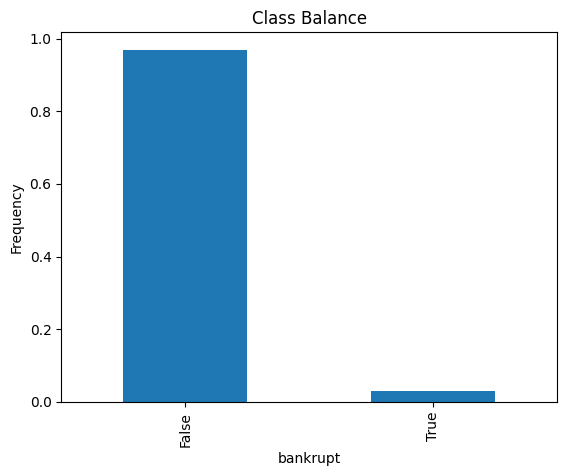

In [ ]:
# Plot class balance
df['bankrupt'].value_counts(normalize=True).plot(kind='bar',)
plt.xlabel('bankrupt')
plt.ylabel('Frequency')
plt.title('Class Balance'),

The dataset is highly imbalanced, with only 5% of the companies suffering bankrupty.

### 6.1 Split and Cross validation

In [ ]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (1228, 95)
y_test shape: (1228,)


### 6.2 Resampling of The Dataset to Handle Imbalance
We adopted Oversampling because it allows us preserve our dataset especially in our case where we dont have a huge dataset.It also improves minority representation thus increasing good generalization on the testset and real world dataset.

In [ ]:
over_sampler =RandomOverSampler(random_state=42)
X_train_over, y_train_over =over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


## 7.0 Build Model

### 7.1 Iteration

In [ ]:
#initializing the classifier algorithm
clf =GradientBoostingClassifier()


I will Perform cross-validation with the classifier using the over-sampled training data, and assign the results to cv_scores,set the cv argument to 5.

In [ ]:
cv_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_scores)

[0.96741986 0.97267472 0.96845426 0.97266036 0.96898002]


### 7.2 Hyperparameter Tunning

In [ ]:
#selecting the best number of estimators and maximum tree depth
params = {
    'n_estimators': range(20, 31, 5),
    'max_depth': range(2, 5)
}


Create a GridSearchCV named model that includes your classifier and hyperparameter grid. Be sure to set cv to 5, n_jobs to -1, and verbose to 1.

In [ ]:
#building the model using the hyperparameters define above
model =GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [ ]:
model.fit(X_train_over, y_train_over)#fitting the model

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'n_estimators': range(20, 31, 5)},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.814131,0.616237,0.022599,0.016026,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.902260,0.895954,0.900105,0.909569,0.905889,0.902755,0.004686,9
1,5.822184,0.940606,0.011574,0.002970,2,25,"{'max_depth': 2, 'n_estimators': 25}",0.916973,0.903311,0.912198,0.920610,0.911146,0.912847,0.005857,8
2,6.581694,0.731857,0.018964,0.011464,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.921703,0.906989,0.915352,0.924816,0.917981,0.917368,0.006106,7
3,6.674433,1.029780,0.009880,0.000273,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.930636,0.928008,0.925868,0.931651,0.930599,0.929352,0.002118,6
4,7.920831,1.180818,0.010877,0.000884,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.936416,0.932738,0.927445,0.936909,0.935331,0.933768,0.003475,5


Extract the best hyperparameters from your model and assign them to best_params.

In [ ]:
best_params = model.best_params_
print(best_params)

{'max_depth': 4, 'n_estimators': 30}


We got the max_depth at 4 and n_estimators at 30 as the best parameters to build the model with.

### 7.3 Evaluate

In [ ]:
acc_train = model.score(X_train_over,y_train_over)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9715
Validation Accuracy: 0.9381


Accuracy score of 94% looks impressive on the surface, but it's misleading in imbalanced datasets. Because 95% of companies are non-bankrupt, a model that always predicts “non-bankrupt” would already achieve ~95% accuracy — without learning anything meaningful.

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x78ff6812d7d0>,)

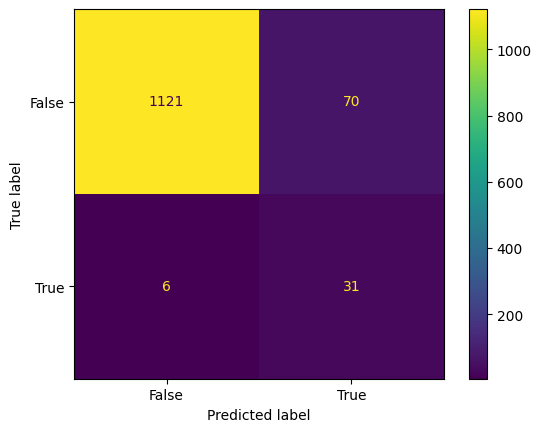

In [ ]:
# plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test),

In [ ]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       0.99      0.94      0.97      1191
        True       0.31      0.84      0.45        37

    accuracy                           0.94      1228
   macro avg       0.65      0.89      0.71      1228
weighted avg       0.97      0.94      0.95      1228



Precision (for bankrupt = True): 0.31

*   Only 31% of the companies the model predicted as bankrupt were actually bankrupt.
*   This is low, indicating a high false positive rate (many companies wrongly flagged as bankrupt).

Recall (for bankrupt = True): 0.84

*   The model correctly identified 84% of all actual bankrupt companies.
*   This is very good, showing that the model is sensitive to detecting bankruptcies, which is critical in this domain.








## 8.0 Communicate

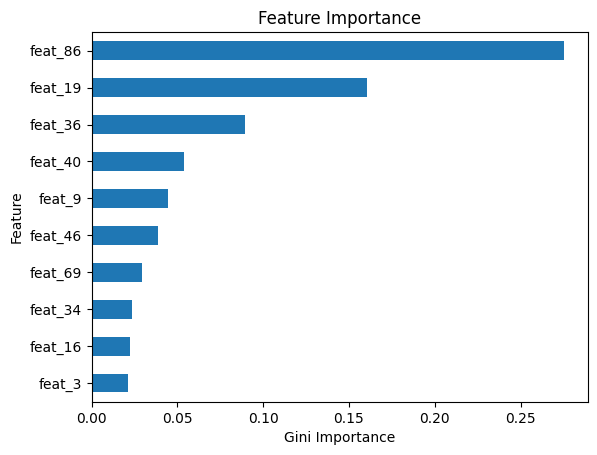

In [ ]:
# Get the best model from GridSearchCV
best_model = model.best_estimator_

# Check if the model has feature_importances_
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    # Put importances into a Series
    feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

else:
    print("The selected model does not have feature_importances_.")

# Plot series
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

🔍 Top Feature Importances:
1. feat_86 - Net Income to Total Assets

2. feat_19 - Persistent EPS in the Last Four Seasons

👉 What this means:

*   Net Income to Total Assets reflects how efficiently a company turns its assets into profit. If a company consistently generates little or negative income from its assets, it's more likely to go bankrupt.
*   Persistent EPS (Earnings Per Share) over the last four seasons indicates consistent profitability. Fluctuating or persistently low/negative EPS can be a strong bankruptcy signal.

🔽 Least Feature Importances:

1. feat_34 - Quick Ratio

2. feat_16 - Net Value Per Share (B)

3. feat_3 - ROA(B) before interest and depreciation after tax

👉 What this means:

* Quick Ratio measures short-term liquidity — while useful, it may not be as decisive for long-term bankruptcy in this dataset.

* Net Value Per Share (B) and ROA(B) might show weak correlation with bankruptcy in your data, or may be redundant with other stronger features.

* It could also mean these features are less reliable, less variable, or not well represented across bankrupt companies in the dataset.













## 9.0 Save Model and Make Predictions
### 9.1 We save the model for future predictions with real worl data.

In [ ]:
with open('/content/model-5-5.pkl','wb') as f:
    pickle.dump(model,f)

### 9.2 Make Predictions With Trained Model

In [ ]:
# # Import your module
from my_predictor_assignment import make_predictions

# # Generate predictions
y_test_pred = make_predictions(
    data_filepath="/content/taiwan_test.xlsx",
    model_filepath="/content/model-5-5.pkl",
 )

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (682,)


,bankrupt
id,
18,False
20,False
24,True
32,True
38,False


## 10.0 Final Insight and Strategic Recommendations

<p align='justify'>The project successfully developed a machine learning model to predict company bankruptcy using financial ratios from Taiwanese firms between 1999 and 2009. Despite significant class imbalance (only ~5% bankrupt companies), the model achieved:
* High accuracy (94%), though this was skewed by the dominance of non-bankrupt cases.</p>

* Strong recall (84%) for bankrupt companies, meaning the model was effective at detecting most actual bankruptcies.

* Moderate precision (31%), indicating a higher false positive rate, but acceptable in risk-averse scenarios where missing a bankruptcy is more costly than a false alarm.



🔍 Key Business and Technical Insights:
Profitability is Key:
1. Features like Net Income to Total Assets and Persistent Earnings Per Share (EPS) were the most important predictors — confirming that sustained profitability is a core indicator of financial health.

2. Model Suitability:
The model is well-suited for early warning systems, investor risk assessments, and credit risk evaluation — especially in contexts where catching bankruptcies early is more critical than perfect prediction.
3. Imbalanced Data Was Handled Effectively:
By using oversampling techniques (Random Oversampler, SMOTE), the project balanced the dataset without losing valuable information from the majority class.

4. Trade-offs Matter:
 * Stakeholders must consider the trade-off between false positives and false negatives:
Regulators and investors may prefer high recall to minimize risk.

 * Lenders and credit managers may require higher precision to avoid wrongly flagging healthy firms.




### 10.1✅ Conclusion:
The model provides a valuable predictive tool that identifies high-risk companies using interpretable financial metrics. While not perfect, it offers meaningful insights for financial decision-making, especially when used as part of a broader risk management strategy.



## 11.0 Appendix 1

### 11.1 Taiwan Bankruptcy Dataset

| feature      | description                                             |
| :----------- | :------------------------------------------------------ |
| **bankrupt** | Whether or not company has gone bankrupt                |
| **feat_1**   | ROA(C) before interest and depreciation before interest |
| **feat_2**   | ROA(A) before interest and % after tax                  |
| **feat_3**   | ROA(B) before interest and depreciation after tax       |
| **feat_4**   | Operating Gross Margin                                  |
| **feat_5**   | Realized Sales Gross Margin                             |
| **feat_6**   | Operating Profit Rate                                   |
| **feat_7**   | Pre-tax net Interest Rate                               |
| **feat_8**   | After-tax net Interest Rate                             |
| **feat_9**   | Non-industry income and expenditure/revenue             |
| **feat_10**  | Continuous interest rate (after tax)                    |
| **feat_11**  | Operating Expense Rate                                  |
| **feat_12**  | Research and development expense rate                   |
| **feat_13**  | Cash flow rate                                          |
| **feat_14**  | Interest-bearing debt interest rate                     |
| **feat_15**  | Tax rate (A)                                            |
| **feat_16**  | Net Value Per Share (B)                                 |
| **feat_17**  | Net Value Per Share (A)                                 |
| **feat_18**  | Net Value Per Share (C)                                 |
| **feat_19**  | Persistent EPS in the Last Four Seasons                 |
| **feat_20**  | Cash Flow Per Share                                     |
| **feat_21**  | Revenue Per Share (Yuan ¥)                              |
| **feat_22**  | Operating Profit Per Share (Yuan ¥)                     |
| **feat_23**  | Per Share Net profit before tax (Yuan ¥)                |
| **feat_24**  | Realized Sales Gross Profit Growth Rate                 |
| **feat_25**  | Operating Profit Growth Rate                            |
| **feat_26**  | After-tax Net Profit Growth Rate                        |
| **feat_27**  | Regular Net Profit Growth Rate                          |
| **feat_28**  | Continuous Net Profit Growth Rate                       |
| **feat_29**  | Total Asset Growth Rate                                 |
| **feat_30**  | Net Value Growth Rate                                   |
| **feat_31**  | Total Asset Return Growth Rate Ratio                    |
| **feat_32**  | Cash Reinvestment %                                     |
| **feat_33**  | Current Ratio                                           |
| **feat_34**  | Quick Ratio                                             |
| **feat_35**  | Interest Expense Ratio                                  |
| **feat_36**  | Total debt/Total net worth                              |
| **feat_37**  | Debt ratio %                                            |
| **feat_38**  | Net worth/Assets                                        |
| **feat_39**  | Long-term fund suitability ratio (A)                    |
| **feat_40**  | Borrowing dependency                                    |
| **feat_41**  | Contingent liabilities/Net worth                        |
| **feat_42**  | Operating profit/Paid-in capital                        |
| **feat_43**  | Net profit before tax/Paid-in capital                   |
| **feat_44**  | Inventory and accounts receivable/Net value             |
| **feat_45**  | Total Asset Turnover                                    |
| **feat_46**  | Accounts Receivable Turnover                            |
| **feat_47**  | Average Collection Days                                 |
| **feat_48**  | Inventory Turnover Rate (times)                         |
| **feat_49**  | Fixed Assets Turnover Frequency                         |
| **feat_50**  | Net Worth Turnover Rate (times)                         |
| **feat_51**  | Revenue per person                                      |
| **feat_52**  | Operating profit per person                             |
| **feat_53**  | Allocation rate per person                              |
| **feat_54**  | Working Capital to Total Assets                         |
| **feat_55**  | Quick Assets/Total Assets                               |
| **feat_56**  | Current Assets/Total Assets                             |
| **feat_57**  | Cash/Total Assets                                       |
| **feat_58**  | Quick Assets/Current Liability                          |
| **feat_59**  | Cash/Current Liability                                  |
| **feat_60**  | Current Liability to Assets                             |
| **feat_61**  | Operating Funds to Liability                            |
| **feat_62**  | Inventory/Working Capital                               |
| **feat_63**  | Inventory/Current Liability                             |
| **feat_64**  | Current Liabilities/Liability                           |
| **feat_65**  | Working Capital/Equity                                  |
| **feat_66**  | Current Liabilities/Equity                              |
| **feat_67**  | Long-term Liability to Current Assets                   |
| **feat_68**  | Retained Earnings to Total Assets                       |
| **feat_69**  | Total income/Total expense                              |
| **feat_70**  | Total expense/Assets                                    |
| **feat_71**  | Current Asset Turnover Rate                             |
| **feat_72**  | Quick Asset Turnover Rate                               |
| **feat_73**  | Working Capital Turnover Rate                           |
| **feat_74**  | Cash Turnover Rate                                      |
| **feat_75**  | Cash Flow to Sales                                      |
| **feat_76**  | Fixed Assets to Assets                                  |
| **feat_77**  | Current Liability to Liability                          |
| **feat_78**  | Current Liability to Equity                             |
| **feat_79**  | Equity to Long-term Liability                           |
| **feat_80**  | Cash Flow to Total Assets                               |
| **feat_81**  | Cash Flow to Liability                                  |
| **feat_82**  | CFO to Assets                                           |
| **feat_83**  | Cash Flow to Equity                                     |
| **feat_84**  | Current Liability to Current Assets                     |
| **feat_85**  | Liability-Assets Flag                                   |
| **feat_86**  | Net Income to Total Assets                              |
| **feat_87**  | Total assets to GNP price                               |
| **feat_88**  | No-credit Interval                                      |
| **feat_89**  | Gross Profit to Sales                                   |
| **feat_90**  | Net Income to Stockholder's Equity                      |
| **feat_91**  | Liability to Equity                                     |
| **feat_92**  | Degree of Financial Leverage (DFL)                      |
| **feat_93**  | Interest Coverage Ratio (Interest expense to EBIT)      |
| **feat_94**  | Net Income Flag                                         |
| **feat_95**  | Equity to Liability                                     |
